In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


Dimension de X:  (100, 2)
Dimension de y:  (100, 1)


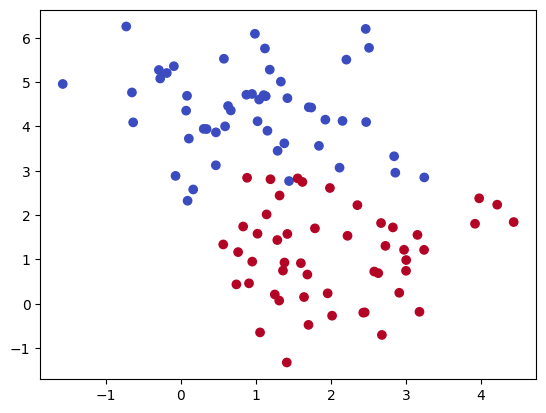

In [18]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(-1, 1)

print("Dimension de X: ", X.shape)
print("Dimension de y: ", y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

In [4]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W, b

In [5]:
W, b = initialisation(X)
print("Dimension de W: ", W.shape)
print("Dimension de b: ", b.shape)

Dimension de W:  (2, 1)
Dimension de b:  (1,)


In [6]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [7]:
A = model(X, W, b)
print("Dimension de A: ", A.shape)

Dimension de A:  (100, 1)


In [8]:
def log_loss(A, y):
    return -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))

In [9]:
log_loss(A, y)

2.3032734392869094

In [10]:
def gradients(A, X, y):
    dW = np.dot(X.T, A - y) / len(y)
    db = np.mean(A - y)
    return dW, db

In [11]:
dW, db = gradients(A, X, y)
print("Dimension de dW: ", dW.shape)
print("Valeur de dW: ", dW)
print("Valeur de db: ", db)

Dimension de dW:  (2, 1)
Valeur de dW:  [[0.45839097]
 [2.1287281 ]]
Valeur de db:  0.4792307148198652


In [12]:
def update(dw, db, W, b, learning_rate):
    W = W - learning_rate * dw
    b = b - learning_rate * db
    return W, b

In [13]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A) # Pour voir les valeurs de A "Probabilité"
    return A >= 0.5

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        loss = log_loss(A, y)
        Loss.append(loss)
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print("Accuracy: ", np.mean(y_pred == y))
    print("Accuracy_: ", accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()
    
    return W, b

[[0.92849011]
 [0.82677598]
 [0.01010605]
 [0.22784183]
 [0.94354919]
 [0.37704644]
 [0.0860511 ]
 [0.89940611]
 [0.06769755]
 [0.89541836]
 [0.04341318]
 [0.88483891]
 [0.02932175]
 [0.02997608]
 [0.72747601]
 [0.96052592]
 [0.98661397]
 [0.05656917]
 [0.80826491]
 [0.69503331]
 [0.05274632]
 [0.04974566]
 [0.43665511]
 [0.00954563]
 [0.94052976]
 [0.04092459]
 [0.91297036]
 [0.01027688]
 [0.07035917]
 [0.71304079]
 [0.97471354]
 [0.05296844]
 [0.74301744]
 [0.97497094]
 [0.42059019]
 [0.20432245]
 [0.81274892]
 [0.53913597]
 [0.44208063]
 [0.57196582]
 [0.1211368 ]
 [0.05416054]
 [0.001867  ]
 [0.18295763]
 [0.25294006]
 [0.82552776]
 [0.96631623]
 [0.96454553]
 [0.01020421]
 [0.01317475]
 [0.93979187]
 [0.65853975]
 [0.033257  ]
 [0.0443612 ]
 [0.73459138]
 [0.05024269]
 [0.63541979]
 [0.84278269]
 [0.92929014]
 [0.98819796]
 [0.68833064]
 [0.16866895]
 [0.00877502]
 [0.90518669]
 [0.01657592]
 [0.3858268 ]
 [0.06011208]
 [0.53333903]
 [0.91409994]
 [0.26487213]
 [0.19946167]
 [0.92

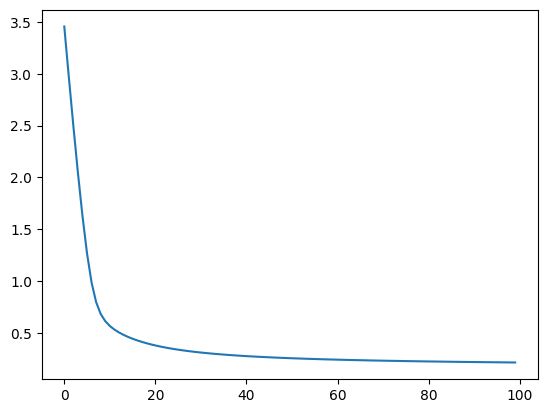

In [16]:
W, b = artificial_neuron(X, y)

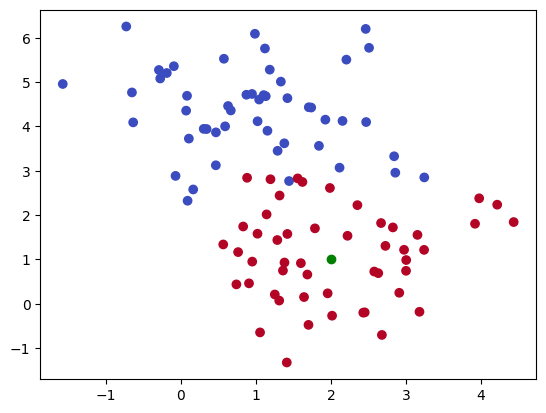

[0.87466935]


array([ True])

In [17]:
new_plant = np.array([2, 1])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(new_plant[0], new_plant[1], c="g")
plt.show()

predict(new_plant, W, b)